In [27]:
%matplotlib inline
import pandas as pd
import pickle; json
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from yellowbrick.datasets import load_concrete
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.target import FeatureCorrelation

import seaborn as sns

# The dataset elements
CEMENT = 'Cement (component 1)(kg in a m^3 mixture)'; cement='cement'
SLAG ='Blast Furnace Slag (component 2)(kg in a m^3 mixture)'; slag = 'slag'
ASH = 'Fly Ash (component 3)(kg in a m^3 mixture)'; ash='ash'
WATER = 'Water  (component 4)(kg in a m^3 mixture)'; water = 'water'
SP = 'Superplasticizer (component 5)(kg in a m^3 mixture)'; sp = 'sp'
COARSE_AGG = 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'; coarse_agg = 'coarse_agg'
FINE_AGG = 'Fine Aggregate (component 7)(kg in a m^3 mixture)'; fine_agg = 'fine_agg'
AGE = 'Age (day)'; age= 'age'
STRENGTH = 'Concrete compressive strength(MPa, megapascals) '; strength='strength'

FILE_NAME_PICKLE = 'processed_data.pickle'; FILE_NAME_JSON = 'processed_data.json'

## Overview

We will use this notebook to study the "Concrete Compressive Strength" dataset. We will also prepare the data for consumption by the ml notebooks.

## Utility Functions

In [28]:
def get_column_names(target_col_name = strength):
    x_cols = list(df.columns.values)
    x_cols.remove(target_col_name) 
    return x_cols, [target_col_name]

## Data Analysis and Preparation

### Load Data Set

In [29]:
# load data
df = pd.read_excel('Concrete_Data.xls')

# rename the column names
df.rename(columns={CEMENT: cement, 
                   SLAG: slag,
                   ASH: ash,
                   WATER: water,
                   SP: sp,
                   COARSE_AGG: coarse_agg,
                   FINE_AGG: fine_agg,
                   AGE: age,
                   STRENGTH: strength
                  }, inplace = True)

# get features and target column names
x_col_names, y_col_name = get_column_names()

### A look at the data

In [30]:
df.head()

,cement,slag,ash,water,sp,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### Data Set Characteristics

We will take a look at the data types and some general information about the feature distributions.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement        1030 non-null float64
slag          1030 non-null float64
ash           1030 non-null float64
water         1030 non-null float64
sp            1030 non-null float64
coarse_agg    1030 non-null float64
fine_agg      1030 non-null float64
age           1030 non-null int64
strength      1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [32]:
df.describe()

,cement,slag,ash,water,sp,coarse_agg,fine_agg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Also, as expected, there are no missing values in the dataset.

In [33]:
df.isnull().values.any()

False

### The impact of concrete age on strength
Usually, concrete is considered cured at 28 days. We will be focusing a little bit more on the characteristics of concrete at this age. Also we noticed that most samples in the dataset are for this age category. 

In [34]:
df.groupby(age).count()

,cement,slag,ash,water,sp,coarse_agg,fine_agg,strength
age,,,,,,,,
1,2,2,2,2,2,2,2,2
3,134,134,134,134,134,134,134,134
7,126,126,126,126,126,126,126,126
14,62,62,62,62,62,62,62,62
28,425,425,425,425,425,425,425,425
56,91,91,91,91,91,91,91,91
90,54,54,54,54,54,54,54,54
91,22,22,22,22,22,22,22,22
100,52,52,52,52,52,52,52,52


In [35]:
df_28_days = df[df[age]==28]

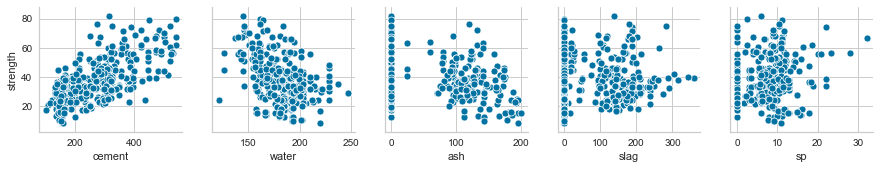

In [36]:
sns.pairplot(df_28_days, y_vars=[strength], x_vars=[cement, water, ash, slag, sp]);

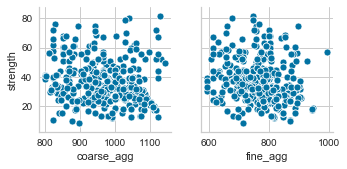

In [37]:
# pd.plotting.scatter_matrix(df_28_days)
sns.pairplot(df_28_days, y_vars=[strength], x_vars=[coarse_agg, fine_agg]);

### Data Visualizations

In [38]:
X = df[x_col_names]
y = df[y_col_name]

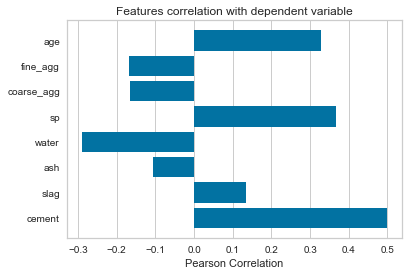

In [39]:
# Instantiate the visualizer
visualizer = FeatureCorrelation()

visualizer.fit(X, y[strength])        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

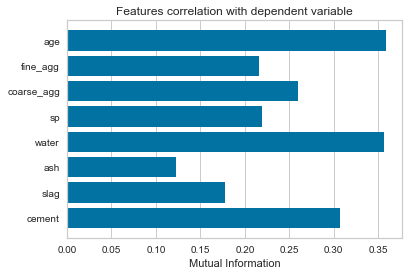

In [40]:
# Instantiate the visualizer
visualizer = FeatureCorrelation(method='mutual_info-regression')

visualizer.fit(X, y[strength])        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

## Data Preparation

### Split Training - Test Data Sets

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

Check the splits:

In [42]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(824, 8) (824, 1) (206, 8) (206, 1)


### Scaling the data
We will use the min-max scaler to bring all features in the same range.

In [43]:
pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler())
])

X_train = pipeline.fit_transform(X_train.values)
X_test = pipeline.transform(X_test.values)

### Save the processed data
The data that has been processed will be saved so it is available to all ml notebooks.

In [44]:
# save as pickle, the data sets are numpy arrays
obj= {
        'X_train': X_train,
        'y_train': y_train[y_train.columns[0]].values,
        'X_test': X_test,
        'y_test': y_test[y_test.columns[0]].values
     }

file_obj = open(FILE_NAME_PICKLE, 'wb')
pickle.dump(obj, file_obj)
file_obj.close()

In [45]:
# save as json
obj= {
        'X_train': X_train.tolist(),
        'y_train': y_train[y_train.columns[0]].tolist(),
        'X_test': X_test.tolist(),
        'y_test': y_test[y_test.columns[0]].tolist()
     }

file_obj = open(FILE_NAME_JSON, 'w')
json.dump(obj, file_obj)
file_obj.close()